# Lecture 4: Advanced data structures & logical indexing
ENVR 890-001: Python for Environmental Research, Fall 2020

September 4, 2020

By Andrew Hamilton. Some material adapted from Greg Characklis, David Gorelick and H.B. Zeff.

## Summary
In this lecture, we will first learn about using **list comprehensions** to write for loops in a more efficient and compact way. We will then move beyond the standard data structures (list, tuple, dictionary) to two advanced data structures, the **NumPy array** and the **Pandas DataFrame**. Along the way, we will learn how **logical indexing** can be used with NumPy and Pandas as a powerful tool to retrieve and manipulate particular subsets of data.

## List comprehensions
As we learned last week, **loops** can be used to execute a code block for every item in a data structure. For example, to a list of the cosines of all integer degrees between 0 and 90, we can write:

In [1]:
import math

def radians(degrees):
    return degrees * (2 * math.pi / 360)

In [2]:
cos = []
for d in range(0, 91):
    cos.append( math.cos( radians(d) ) )
print(cos)
print()
print( len(cos) )

[1.0, 0.9998476951563913, 0.9993908270190958, 0.9986295347545738, 0.9975640502598242, 0.9961946980917455, 0.9945218953682733, 0.992546151641322, 0.9902680687415704, 0.9876883405951378, 0.984807753012208, 0.981627183447664, 0.9781476007338057, 0.9743700647852352, 0.9702957262759965, 0.9659258262890683, 0.9612616959383189, 0.9563047559630354, 0.9510565162951535, 0.9455185755993168, 0.9396926207859084, 0.9335804264972017, 0.9271838545667874, 0.9205048534524404, 0.9135454576426009, 0.9063077870366499, 0.898794046299167, 0.8910065241883679, 0.882947592858927, 0.8746197071393957, 0.8660254037844387, 0.8571673007021123, 0.848048096156426, 0.838670567945424, 0.8290375725550416, 0.8191520442889918, 0.8090169943749475, 0.7986355100472928, 0.7880107536067219, 0.7771459614569709, 0.766044443118978, 0.754709580222772, 0.7431448254773942, 0.7313537016191705, 0.7193398003386512, 0.7071067811865476, 0.6946583704589973, 0.6819983600624985, 0.6691306063588582, 0.6560590289905073, 0.6427876096865394, 0.6

[**List comprehensions**](https://docs.python.org/3/tutorial/datastructures.html) are a way to write for loops in a more compact and computationally efficient way:

In [3]:
cos_lc = [math.cos( radians(d) ) for d in range(0, 91)]
print(cos_lc)
print()
print(cos == cos_lc)

[1.0, 0.9998476951563913, 0.9993908270190958, 0.9986295347545738, 0.9975640502598242, 0.9961946980917455, 0.9945218953682733, 0.992546151641322, 0.9902680687415704, 0.9876883405951378, 0.984807753012208, 0.981627183447664, 0.9781476007338057, 0.9743700647852352, 0.9702957262759965, 0.9659258262890683, 0.9612616959383189, 0.9563047559630354, 0.9510565162951535, 0.9455185755993168, 0.9396926207859084, 0.9335804264972017, 0.9271838545667874, 0.9205048534524404, 0.9135454576426009, 0.9063077870366499, 0.898794046299167, 0.8910065241883679, 0.882947592858927, 0.8746197071393957, 0.8660254037844387, 0.8571673007021123, 0.848048096156426, 0.838670567945424, 0.8290375725550416, 0.8191520442889918, 0.8090169943749475, 0.7986355100472928, 0.7880107536067219, 0.7771459614569709, 0.766044443118978, 0.754709580222772, 0.7431448254773942, 0.7313537016191705, 0.7193398003386512, 0.7071067811865476, 0.6946583704589973, 0.6819983600624985, 0.6691306063588582, 0.6560590289905073, 0.6427876096865394, 0.6

The list comprehension syntax can be thought of as an **expression** (e.g., what to do to each element) followed by a **for clause**, all surrounded by brackets. 

We can include an **if clause** to include only certain elements (for example, those whose degrees are divisible by 10) in the final list:

In [4]:
cos_divisible10 = []
for d in range(0, 91):
    if d % 10 == 0:
        cos_divisible10.append( math.cos( radians(d) ) )
print(cos_divisible10)
print()

[1.0, 0.984807753012208, 0.9396926207859084, 0.8660254037844387, 0.766044443118978, 0.6427876096865394, 0.5000000000000001, 0.3420201433256688, 0.17364817766693041, 6.123233995736766e-17]



In [5]:
cos_divisible10_lc = [math.cos( radians(d) ) for d in range(0, 91) if d % 10 == 0]
print(cos_divisible10_lc)
print()

# print(cos_divisible10 == cos_divisible10_lc)

[1.0, 0.984807753012208, 0.9396926207859084, 0.8660254037844387, 0.766044443118978, 0.6427876096865394, 0.5000000000000001, 0.3420201433256688, 0.17364817766693041, 6.123233995736766e-17]



We can also include multiple input variables and/or multiple output variables:

In [6]:
def cos_plus_sin(d1, d2):
    return math.cos( radians(d1) ) + math.sin( radians(d2) )
def cos2_plus_sin2(d1, d2):
    return math.cos( radians(d1) ) **2 + math.sin( radians(d2) ) **2

cos_sin_tuples = []
for d1 in range(0, 91, 45):
    for d2 in range(0, 91, 45):
        cos_sin_tuples.append( (cos_plus_sin(d1, d2), cos2_plus_sin2(d1, d2)) )
print(cos_sin_tuples)
print()

[(1.0, 1.0), (1.7071067811865475, 1.5), (2.0, 2.0), (0.7071067811865476, 0.5000000000000001), (1.414213562373095, 1.0), (1.7071067811865475, 1.5), (6.123233995736766e-17, 3.749399456654644e-33), (0.7071067811865476, 0.4999999999999999), (1.0, 1.0)]



In [7]:
cos_sin_tuples_lc = [(cos_plus_sin(d1, d2), cos2_plus_sin2(d1, d2)) for d1 in range(0, 91, 45) for d2 in range(0, 91, 45)]
print(cos_sin_tuples_lc)
print()

print(cos_sin_tuples == cos_sin_tuples_lc)

[(1.0, 1.0), (1.7071067811865475, 1.5), (2.0, 2.0), (0.7071067811865476, 0.5000000000000001), (1.414213562373095, 1.0), (1.7071067811865475, 1.5), (6.123233995736766e-17, 3.749399456654644e-33), (0.7071067811865476, 0.4999999999999999), (1.0, 1.0)]

True


### In class exercise
Assume you work for the county office of environmental quality, and are administering a program that will provide subsidized water quality assessments for all households that rely on private groundwater wells and have incomes less than \$30,000 per year. First I will create random demographic data for 1000 households (but pretend for the exercise that this was retrieved from a county database).

In [8]:
import random
## numeric index for each household in county
household = list(range(1000))
# print(household)

In [9]:
## water source for each household
water = [random.choices(['municipal', 'private'], weights = [0.6, 0.4], k=1)[0] for h in household]
# print(water)

In [10]:
## income for each household 
income = [max(random.gauss(50000, 20000), 0) for h in household]
# print(income)

Now use list comprehension to find the list of households meeting our two criteria. How many households will we need to test?

## NumPy
[NumPy](https://numpy.org/doc/stable/) is one of the most popular packages for scientific computing and data science, and is included in the standard Anaconda installation. It is commonly imported with the **alias** ``np``. 

In [11]:
import numpy as np

### Creating NumPy arrays
NumPy supports a new type of data structure: the **NumPy array**. NumPy arrays are designed to handle large, multi-dimensional arrays of numbers much more easily and efficiently than standard lists.

In [12]:
# here is a standard list with two dimensions
l = [[1, 2, 3, 4, 5], [10, 9, 8, 7, 6]]
print(l, type(l))

[[1, 2, 3, 4, 5], [10, 9, 8, 7, 6]] <class 'list'>


In [13]:
# create a 2D numpy array from l
a = np.array(l)
print(a, type(a))

[[ 1  2  3  4  5]
 [10  9  8  7  6]] <class 'numpy.ndarray'>


Note that, unlike the basic data structures such as lists, **all elements in a NumPy array must be the same type**. Although string types are allowed, NumPy is most commonly used with numeric types such as int and float.

We access the elements the same way as lists:

In [14]:
print(l[1][0])
print(a[1][0])

10
10


Or, alternatively, in a single brackets and separated by a comma:

In [15]:
print(a[0, 2])

3


We can get the number of dimensions and the shape of an array using its ``ndim`` and ``shape`` **properties**. For a 2D array, the shape is (number of rows, number of columns). For larger arrays, it always goes from the innermost set of brackets to the outermost set of brackets.

In [16]:
print( a.ndim )
print( a.shape )
for i in range(a.shape[0]):
    for j in range(a.shape[1]):
        print( a[i, j])

2
(2, 5)
1
2
3
4
5
10
9
8
7
6


We can also do multi-dimensional **slices**

In [17]:
print(a[:, 1:4])

[[2 3 4]
 [9 8 7]]


NumPy also has handy **functions** for creating different types of arrays. For example, we can create a new array filled with ones or zeros:

In [18]:
# with a single argument, we will get a 1D array of that length
a = np.ones(3)
print(a, a.shape)

[1. 1. 1.] (3,)


In [19]:
# with a single argument, we will get a 1D array of that length
a = np.ones(3)*3
print(a, a.shape)

[3. 3. 3.] (3,)


In [20]:
# alternatively, we can give a tuple or list for multi-dimensional arrays
a = np.zeros((3, 10, 20))
print(a, a.shape)

[[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

We can also create **sequences** of numbers easily (similar to list(range()) for lists):

In [21]:
# with one argument, it is assumed to start at zero and count up by one until it reaches your number (not inclusive, it will stop before your number)
a = np.arange(10)
print(a, type(a))

[0 1 2 3 4 5 6 7 8 9] <class 'numpy.ndarray'>


In [22]:
# with two arguments, it will start at the 1st number and count up by 1 until reaching the 2nd number
a = np.arange(100, 120)
print(a)

[100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119]


In [23]:
# with three arguments, it will start at the 1st and count by increments of the 3rd number until it reaches the 2rd number (again not inclusive)
a = np.arange(10, -21, -5)
print(a)

[ 10   5   0  -5 -10 -15 -20]


We can draw **random samples** from a normal distribution (or many other distributions). NumPy has functions for creating whole arrays at a time, rather than the one-by-one approach needed for the ``random`` module.

In [24]:
a = np.random.normal(loc = 10, scale = 8, size = (10, 10))
print(a)

[[ 9.36237955 22.44480965 11.57792989 15.02473124  4.49549165 22.71585532
  15.67406652 -0.0513272  17.17435491 11.45989197]
 [ 4.91606205  4.25811471  9.57682498 11.6286654  24.23646103 21.29772585
   9.97908358 10.1154093   4.95000275 -7.76083539]
 [ 8.90318581  5.26311915 11.22840978  4.89847608  9.5007641  11.71336958
  20.22803545  4.70123392  0.18841485  5.7480882 ]
 [16.8334066   0.89632901 17.68067056  5.1638311  15.97932614  5.24160249
  10.84790493  4.20492827 19.97649486 21.77050324]
 [-4.20869991  9.65486085  6.07739072  6.57658338 10.26036376  2.24603248
  10.84930473 14.17485957 16.15187673  4.26391888]
 [10.06221922 18.74598551  7.04970248 11.24001649 14.9783088   8.45205573
  18.55375384  9.88684085 10.42270003 20.58194496]
 [15.72507624 14.41194216 14.85741556 10.35201429 15.04184786  2.64624034
  18.17574123 13.54712098 19.23381418  6.39817635]
 [10.71930556 12.02351423 20.22674506  7.30108754  5.52038532 11.89939608
  12.95452277  9.56196872 21.83305109  5.44281665]


### Doing math with NumPy
NumPy makes it very easy to do **element-wise** arithmetic within and between arrays

In [25]:
a = np.array([1, 2, 3])
b = a + 3
print(b)

[4 5 6]


In [26]:
c = a * 2
print(c)

[2 4 6]


In [27]:
d = a ** 2
print(d)

[1 4 9]


In [28]:
e = a + d
print(e)

[ 2  6 12]


In [29]:
f = a ** a
print(f)

[ 1  4 27]


NumPy also has many useful functions that perform more complex **mathematical operations** on these arrays. Below are some examples, and many more can be found [here](https://www.geeksforgeeks.org/numpy-mathematical-function/)

In [30]:
a = np.random.normal(loc = 10, scale = 8, size = (10, 10))
print(a)
print()
# statistics
print(f'Min: {a.min()}')
print()

[[ 1.09155641e+01  9.15442772e+00  2.49702844e+01  1.38870522e+01
   1.16963603e+01  7.52927490e+00  3.24409930e+00  4.86546955e+00
   1.33780068e+01  8.21996553e+00]
 [ 1.40458345e+01  1.69557423e+00 -4.28152727e+00  1.04195354e+01
   8.52530159e+00  1.20538504e+01 -5.98872717e+00  5.15375197e+00
   1.43877863e+01 -9.97062520e-03]
 [ 1.51672781e+01  1.63619597e+01  1.77877112e+01  6.44213712e+00
   1.32667700e+01  3.81786176e+00  1.89480367e-01  7.23531749e+00
   8.53688961e+00  2.25060389e+01]
 [ 1.24609327e+01  1.12668913e+01  8.51566137e+00  6.45947787e+00
   9.18489353e+00  4.60849438e+00  4.38204831e+00  5.02589624e+00
   1.26407802e+01  4.69336431e+00]
 [ 1.81937591e+01  6.02977444e+00  8.74743312e+00  2.84879194e+00
   7.60570678e+00 -1.25044099e+01  1.56082337e+01  1.94606718e+01
   2.38333908e+01  7.92550105e+00]
 [ 2.91481761e+00  2.01887628e+01  9.47205292e+00 -2.26000897e+00
   7.85057344e+00  1.24898109e+01  1.23399145e+01  1.88767131e+01
   1.28947149e+01  1.73399381e+01

In [31]:
print(f'Max of each row: {a.max(axis=1)}' )
print()

Max of each row: [24.97028436 14.38778632 22.5060389  12.6407802  23.83339078 20.18876277
 16.94998061 28.35826224 16.06343448 23.36393254]



In [32]:
print(f'Mean of each column: {a.mean(axis=0)}' )
print()

Mean of each column: [ 7.81698957 12.45838398 11.6418815   9.12246512  9.80680247  5.53002552
  8.7177501   7.91467231 11.62360071  9.50640514]



In [33]:
print(f'Std: {a.std()}' )
print()

Std: 7.408878018296668



In [34]:
print(f'5th percentile: {np.quantile(a, 0.05)}' )
print()

5th percentile: -3.3807574379598444



In [35]:
print(f'Sum of each row: {a.sum(axis=1)}')

Sum of each row: [107.86050478  56.00140932 111.31144417  79.23844024  97.7488528
 112.10728925  98.54530046  80.75148799 105.51984395  92.30519118]


In [36]:
# sort each row
print( np.sort(a, axis=1) )

[[ 3.24409930e+00  4.86546955e+00  7.52927490e+00  8.21996553e+00
   9.15442772e+00  1.09155641e+01  1.16963603e+01  1.33780068e+01
   1.38870522e+01  2.49702844e+01]
 [-5.98872717e+00 -4.28152727e+00 -9.97062520e-03  1.69557423e+00
   5.15375197e+00  8.52530159e+00  1.04195354e+01  1.20538504e+01
   1.40458345e+01  1.43877863e+01]
 [ 1.89480367e-01  3.81786176e+00  6.44213712e+00  7.23531749e+00
   8.53688961e+00  1.32667700e+01  1.51672781e+01  1.63619597e+01
   1.77877112e+01  2.25060389e+01]
 [ 4.38204831e+00  4.60849438e+00  4.69336431e+00  5.02589624e+00
   6.45947787e+00  8.51566137e+00  9.18489353e+00  1.12668913e+01
   1.24609327e+01  1.26407802e+01]
 [-1.25044099e+01  2.84879194e+00  6.02977444e+00  7.60570678e+00
   7.92550105e+00  8.74743312e+00  1.56082337e+01  1.81937591e+01
   1.94606718e+01  2.38333908e+01]
 [-2.26000897e+00  2.91481761e+00  7.85057344e+00  9.47205292e+00
   1.23399145e+01  1.24898109e+01  1.28947149e+01  1.73399381e+01
   1.88767131e+01  2.01887628e+01

In [37]:
# absolute value of each element
print( np.abs(a) )

[[1.09155641e+01 9.15442772e+00 2.49702844e+01 1.38870522e+01
  1.16963603e+01 7.52927490e+00 3.24409930e+00 4.86546955e+00
  1.33780068e+01 8.21996553e+00]
 [1.40458345e+01 1.69557423e+00 4.28152727e+00 1.04195354e+01
  8.52530159e+00 1.20538504e+01 5.98872717e+00 5.15375197e+00
  1.43877863e+01 9.97062520e-03]
 [1.51672781e+01 1.63619597e+01 1.77877112e+01 6.44213712e+00
  1.32667700e+01 3.81786176e+00 1.89480367e-01 7.23531749e+00
  8.53688961e+00 2.25060389e+01]
 [1.24609327e+01 1.12668913e+01 8.51566137e+00 6.45947787e+00
  9.18489353e+00 4.60849438e+00 4.38204831e+00 5.02589624e+00
  1.26407802e+01 4.69336431e+00]
 [1.81937591e+01 6.02977444e+00 8.74743312e+00 2.84879194e+00
  7.60570678e+00 1.25044099e+01 1.56082337e+01 1.94606718e+01
  2.38333908e+01 7.92550105e+00]
 [2.91481761e+00 2.01887628e+01 9.47205292e+00 2.26000897e+00
  7.85057344e+00 1.24898109e+01 1.23399145e+01 1.88767131e+01
  1.28947149e+01 1.73399381e+01]
 [5.87193880e+00 1.04032614e+01 1.48141751e+01 1.69499806e

In [38]:
# exponential
print( np.exp(a) )

[[5.50261658e+04 9.45621733e+03 6.98967062e+10 1.07416285e+06
  1.20133670e+05 1.86175505e+03 2.56386071e+01 1.29731840e+02
  6.45646112e+05 3.71437436e+03]
 [1.25900775e+06 5.44977451e+00 1.38215367e-02 3.35078641e+04
  5.04070679e+03 1.71759475e+05 2.50685282e-03 1.73079663e+02
  1.77229578e+06 9.90078917e-01]
 [3.86424961e+06 1.27617082e+07 5.31012575e+07 6.27746940e+02
  5.77676898e+05 4.55067999e+01 1.20862139e+00 1.38758137e+03
  5.09945834e+03 5.94632309e+09]
 [2.58056201e+05 7.81895549e+04 4.99234676e+03 6.38727471e+02
  9.74874201e+03 1.00332973e+02 8.00017341e+01 1.52306699e+02
  3.08902262e+05 1.09220012e+02]
 [7.96983243e+07 4.15621273e+02 6.29451008e+03 1.72669098e+01
  2.00963177e+03 3.71025518e-06 6.00578468e+06 2.82919170e+08
  2.24238459e+10 2.76695039e+03]
 [1.84454479e+01 5.85960404e+08 1.29915305e+04 1.04349549e-01
  2.56720604e+03 2.65617041e+05 2.28642397e+05 1.57780147e+08
  3.98202101e+05 3.39343404e+07]
 [3.54936466e+02 3.29669687e+04 2.71465420e+06 2.29764562e

In [39]:
# square root. 
print( np.sqrt(a) )

[[3.30387108 3.02562848 4.99702755 3.72653353 3.4199942  2.74395242
  1.80113834 2.20578094 3.65759577 2.86704823]
 [3.74777727 1.30214217        nan 3.22793052 2.91981191 3.47186555
         nan 2.27018765 3.79312356        nan]
 [3.89451898 4.04499193 4.217548   2.53813655 3.64235775 1.95393494
  0.43529343 2.68985455 2.92179561 4.744053  ]
 [3.53000463 3.35661904 2.91816061 2.54155029 3.03065893 2.14674041
  2.09333426 2.24185108 3.55538749 2.16641739]
 [4.2654143  2.4555599  2.95760598 1.68783647 2.75784459        nan
  3.95072572 4.41142514 4.88194539 2.81522664]
 [1.70728369 4.49319071 3.07767005        nan 2.80188748 3.53409265
  3.51282144 4.34473396 3.59092118 4.16412512]
 [2.42320837 3.22540872 3.8489187  4.11703541 3.44112807 2.80144324
  4.10452151 3.67220305 1.91030652        nan]
 [       nan 4.04423157 5.32524762 2.56777772 2.02553553 2.97940962
  3.76318575        nan 2.8102199  1.57619198]
 [       nan 3.60864807 3.69623348 3.26057038 2.78186837 3.73011466
  3.7195796 

/home/andrew/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


Don't be alarmed by the red "RuntimeWarning" here. Usually as long as it is a warning, not an error, you are ok. This warning relates to the special "nan" (Not A Number) values that you see above. These occur when we try to take the square root of a negative number. NumPy returns this special object (np.nan) when we try to do calculations that are undefined.

Rather than element-wise operations, we can also do **matrix operations**. (If your research involves linear algebra, see [here](https://www.geeksforgeeks.org/numpy-linear-algebra/?ref=lbp) for more examples.)

In [40]:
A = a[:3, :3]
print(A)
print()

[[10.91556409  9.15442772 24.97028436]
 [14.04583447  1.69557423 -4.28152727]
 [15.16727807 16.3619597  17.78771117]]



In [41]:
B = a[-3:, -3:]
print(B)

[[-5.15824589  7.8973359   2.48438117]
 [ 5.04054953 16.06343448 11.70584565]
 [ 5.16152405  2.95439708 23.36393254]]


In [42]:
# matrix multiplication
print( np.matmul(A, B) )

[[118.72290591 307.02756137 717.68277925]
 [-86.00444807 125.51208673 -45.2899775 ]
 [ 96.04841734 435.1623191  644.8027585 ]]


In [43]:
# determinant
print( np.linalg.det(A) )

3308.6844180785574


### Logical indexing
**Logical indexing** is a powerful way to manipulate parts of your data that meet certain conditions. The idea is to create a NumPy array of Boolean variables, and then use this array to index a new array. For example, we can change all undefined elements in the array to zero as follows:

In [44]:
b = np.sqrt(a)
print(b)

[[3.30387108 3.02562848 4.99702755 3.72653353 3.4199942  2.74395242
  1.80113834 2.20578094 3.65759577 2.86704823]
 [3.74777727 1.30214217        nan 3.22793052 2.91981191 3.47186555
         nan 2.27018765 3.79312356        nan]
 [3.89451898 4.04499193 4.217548   2.53813655 3.64235775 1.95393494
  0.43529343 2.68985455 2.92179561 4.744053  ]
 [3.53000463 3.35661904 2.91816061 2.54155029 3.03065893 2.14674041
  2.09333426 2.24185108 3.55538749 2.16641739]
 [4.2654143  2.4555599  2.95760598 1.68783647 2.75784459        nan
  3.95072572 4.41142514 4.88194539 2.81522664]
 [1.70728369 4.49319071 3.07767005        nan 2.80188748 3.53409265
  3.51282144 4.34473396 3.59092118 4.16412512]
 [2.42320837 3.22540872 3.8489187  4.11703541 3.44112807 2.80144324
  4.10452151 3.67220305 1.91030652        nan]
 [       nan 4.04423157 5.32524762 2.56777772 2.02553553 2.97940962
  3.76318575        nan 2.8102199  1.57619198]
 [       nan 3.60864807 3.69623348 3.26057038 2.78186837 3.73011466
  3.7195796 

/home/andrew/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


In [45]:
c = np.isnan(b)
print(c)

[[False False False False False False False False False False]
 [False False  True False False False  True False False  True]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False  True False False False False]
 [False False False  True False False False False False False]
 [False False False False False False False False False  True]
 [ True False False False False False False  True False False]
 [ True False False False False False False False False False]
 [False False  True False False  True False False False False]]


In [46]:
d = b.copy()
d[c] = 0
# print(b)
print(d)

[[3.30387108 3.02562848 4.99702755 3.72653353 3.4199942  2.74395242
  1.80113834 2.20578094 3.65759577 2.86704823]
 [3.74777727 1.30214217 0.         3.22793052 2.91981191 3.47186555
  0.         2.27018765 3.79312356 0.        ]
 [3.89451898 4.04499193 4.217548   2.53813655 3.64235775 1.95393494
  0.43529343 2.68985455 2.92179561 4.744053  ]
 [3.53000463 3.35661904 2.91816061 2.54155029 3.03065893 2.14674041
  2.09333426 2.24185108 3.55538749 2.16641739]
 [4.2654143  2.4555599  2.95760598 1.68783647 2.75784459 0.
  3.95072572 4.41142514 4.88194539 2.81522664]
 [1.70728369 4.49319071 3.07767005 0.         2.80188748 3.53409265
  3.51282144 4.34473396 3.59092118 4.16412512]
 [2.42320837 3.22540872 3.8489187  4.11703541 3.44112807 2.80144324
  4.10452151 3.67220305 1.91030652 0.        ]
 [0.         4.04423157 5.32524762 2.56777772 2.02553553 2.97940962
  3.76318575 0.         2.8102199  1.57619198]
 [0.         3.60864807 3.69623348 3.26057038 2.78186837 3.73011466
  3.7195796  2.24511

This can be thought of as a compact representation of two for loops and and one if statement:

In [47]:
e = b.copy()
for i in range(e.shape[0]):
    for j in range(e.shape[1]):
        if np.isnan(e[i,j]):
            e[i,j] = 0
print(e)
print()

[[3.30387108 3.02562848 4.99702755 3.72653353 3.4199942  2.74395242
  1.80113834 2.20578094 3.65759577 2.86704823]
 [3.74777727 1.30214217 0.         3.22793052 2.91981191 3.47186555
  0.         2.27018765 3.79312356 0.        ]
 [3.89451898 4.04499193 4.217548   2.53813655 3.64235775 1.95393494
  0.43529343 2.68985455 2.92179561 4.744053  ]
 [3.53000463 3.35661904 2.91816061 2.54155029 3.03065893 2.14674041
  2.09333426 2.24185108 3.55538749 2.16641739]
 [4.2654143  2.4555599  2.95760598 1.68783647 2.75784459 0.
  3.95072572 4.41142514 4.88194539 2.81522664]
 [1.70728369 4.49319071 3.07767005 0.         2.80188748 3.53409265
  3.51282144 4.34473396 3.59092118 4.16412512]
 [2.42320837 3.22540872 3.8489187  4.11703541 3.44112807 2.80144324
  4.10452151 3.67220305 1.91030652 0.        ]
 [0.         4.04423157 5.32524762 2.56777772 2.02553553 2.97940962
  3.76318575 0.         2.8102199  1.57619198]
 [0.         3.60864807 3.69623348 3.26057038 2.78186837 3.73011466
  3.7195796  2.24511

In [48]:
print(e == d)
print()
print(np.all(e == d))

[[ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]]

True


We can also retrieve particular elements of the NumPy array using logical indexing, which is analagous to list comprehension. However, note that we lose the shape of the array when we pick out particular elements.

In [49]:
print(e)

[[3.30387108 3.02562848 4.99702755 3.72653353 3.4199942  2.74395242
  1.80113834 2.20578094 3.65759577 2.86704823]
 [3.74777727 1.30214217 0.         3.22793052 2.91981191 3.47186555
  0.         2.27018765 3.79312356 0.        ]
 [3.89451898 4.04499193 4.217548   2.53813655 3.64235775 1.95393494
  0.43529343 2.68985455 2.92179561 4.744053  ]
 [3.53000463 3.35661904 2.91816061 2.54155029 3.03065893 2.14674041
  2.09333426 2.24185108 3.55538749 2.16641739]
 [4.2654143  2.4555599  2.95760598 1.68783647 2.75784459 0.
  3.95072572 4.41142514 4.88194539 2.81522664]
 [1.70728369 4.49319071 3.07767005 0.         2.80188748 3.53409265
  3.51282144 4.34473396 3.59092118 4.16412512]
 [2.42320837 3.22540872 3.8489187  4.11703541 3.44112807 2.80144324
  4.10452151 3.67220305 1.91030652 0.        ]
 [0.         4.04423157 5.32524762 2.56777772 2.02553553 2.97940962
  3.76318575 0.         2.8102199  1.57619198]
 [0.         3.60864807 3.69623348 3.26057038 2.78186837 3.73011466
  3.7195796  2.24511

In [50]:
f = e[e > 4]
print(f)
print(f.shape)

[4.99702755 4.04499193 4.217548   4.744053   4.2654143  4.41142514
 4.88194539 4.49319071 4.34473396 4.16412512 4.11703541 4.10452151
 4.04423157 5.32524762 4.00792147 4.48386421 4.38781077 4.03180739
 4.8336252 ]
(19,)


To apply multiple logical operations at once, we have to use the **bitwise comparison operators** (``&`` and ``|``) rather than the normal comparison operators (``and`` and ``or``). This is because we want the "and/or" to be applied to each element in the array individually, rather than for the entire array at once.

In [51]:
lt2 = e < 2
print(lt2)

[[False False False False False False  True False False False]
 [False  True  True False False False  True False False  True]
 [False False False False False  True  True False False False]
 [False False False False False False False False False False]
 [False False False  True False  True False False False False]
 [ True False False  True False False False False False False]
 [False False False False False False False False  True  True]
 [ True False False False False False False  True False  True]
 [ True False False False False False False False False False]
 [ True False  True False False  True False False  True False]]


In [52]:
gte4 = e >= 4
print(gte4)

[[False False  True False False False False False False False]
 [False False False False False False False False False False]
 [False  True  True False False False False False False  True]
 [False False False False False False False False False False]
 [ True False False False False False False  True  True False]
 [False  True False False False False False  True False  True]
 [False False False  True False False  True False False False]
 [False  True  True False False False False False False False]
 [False False False False False False False False  True False]
 [False  True False  True  True False False False False  True]]


In [53]:
lt2_or_gte4 = lt2 | gte4
print(lt2_or_gte4)

[[False False  True False False False  True False False False]
 [False  True  True False False False  True False False  True]
 [False  True  True False False  True  True False False  True]
 [False False False False False False False False False False]
 [ True False False  True False  True False  True  True False]
 [ True  True False  True False False False  True False  True]
 [False False False  True False False  True False  True  True]
 [ True  True  True False False False False  True False  True]
 [ True False False False False False False False  True False]
 [ True  True  True  True  True  True False False  True  True]]


In [54]:
# lt2_or_gte4 = lt2 or gte4


In [55]:
g = e[lt2_or_gte4]
print(g)
print(g.shape)

[4.99702755 1.80113834 1.30214217 0.         0.         0.
 4.04499193 4.217548   1.95393494 0.43529343 4.744053   4.2654143
 1.68783647 0.         4.41142514 4.88194539 1.70728369 4.49319071
 0.         4.34473396 4.16412512 4.11703541 4.10452151 1.91030652
 0.         0.         4.04423157 5.32524762 0.         1.57619198
 0.         4.00792147 1.27049506 4.48386421 0.         4.38781077
 4.03180739 0.         1.71883597 4.8336252 ]
(40,)


### In class exercise
Let's pretend you are an air quality specialist who is investigating the [effects of wildfire smoke on PM10 pollution](https://www.climacell.co/blog/pm10-how-wildfires-actually-affect-air-quality/). Assume there is a large wildfire burning in the Bozeman, MT, area (45.677, -111.043), and you have a map of PM10 over the larger region spanning from 40 to 48 degrees latitude and -120 to -102 degrees longitude, at a grid resolution of 1 degrees. 

We will make up fake data using an assumed quadratic trend centered around Bozeman, plus random noise. But the same analysis could be performed using ground measurements or satellite observations of PM10.

In [56]:
## use np.arange to create a grid of coordinates
res = 1
long_box = (-120, -102)
lat_box = (40, 48)
long_grid = np.arange(long_box[0], long_box[1] + 0.01, res)
lat_grid = np.arange(lat_box[1], lat_box[0] - 0.01, -res)
long_n = len(long_grid)
lat_n = len(lat_grid)
print(long_grid) 
print(lat_grid)

[-120. -119. -118. -117. -116. -115. -114. -113. -112. -111. -110. -109.
 -108. -107. -106. -105. -104. -103. -102.]
[48. 47. 46. 45. 44. 43. 42. 41. 40.]


In [57]:
## check that coord orientations are correct
coords = [(long, lat) for lat in lat_grid for long in long_grid]
print(coords)

[(-120.0, 48.0), (-119.0, 48.0), (-118.0, 48.0), (-117.0, 48.0), (-116.0, 48.0), (-115.0, 48.0), (-114.0, 48.0), (-113.0, 48.0), (-112.0, 48.0), (-111.0, 48.0), (-110.0, 48.0), (-109.0, 48.0), (-108.0, 48.0), (-107.0, 48.0), (-106.0, 48.0), (-105.0, 48.0), (-104.0, 48.0), (-103.0, 48.0), (-102.0, 48.0), (-120.0, 47.0), (-119.0, 47.0), (-118.0, 47.0), (-117.0, 47.0), (-116.0, 47.0), (-115.0, 47.0), (-114.0, 47.0), (-113.0, 47.0), (-112.0, 47.0), (-111.0, 47.0), (-110.0, 47.0), (-109.0, 47.0), (-108.0, 47.0), (-107.0, 47.0), (-106.0, 47.0), (-105.0, 47.0), (-104.0, 47.0), (-103.0, 47.0), (-102.0, 47.0), (-120.0, 46.0), (-119.0, 46.0), (-118.0, 46.0), (-117.0, 46.0), (-116.0, 46.0), (-115.0, 46.0), (-114.0, 46.0), (-113.0, 46.0), (-112.0, 46.0), (-111.0, 46.0), (-110.0, 46.0), (-109.0, 46.0), (-108.0, 46.0), (-107.0, 46.0), (-106.0, 46.0), (-105.0, 46.0), (-104.0, 46.0), (-103.0, 46.0), (-102.0, 46.0), (-120.0, 45.0), (-119.0, 45.0), (-118.0, 45.0), (-117.0, 45.0), (-116.0, 45.0), (-115.0

In [58]:
## assume a quadratic spatial trend for pm10
long_bozeman = -111.043
lat_bozeman = 45.677
def quadratic_trend(long, lat):
    return -1.3*((long - long_bozeman) **2 + (lat - lat_bozeman) **2) + 160

In [59]:
pm10 = np.array([quadratic_trend(long, lat) for lat in lat_grid for long in long_grid])
print(pm10)
print(pm10.shape)

[ 48.6885686  70.6767686  90.0649686 106.8531686 121.0413686 132.6295686
 141.6177686 148.0059686 151.7941686 152.9823686 151.5705686 147.5587686
 140.9469686 131.7351686 119.9233686 105.5115686  88.4997686  68.8879686
  46.6761686  53.4283686  75.4165686  94.8047686 111.5929686 125.7811686
 137.3693686 146.3575686 152.7457686 156.5339686 157.7221686 156.3103686
 152.2985686 145.6867686 136.4749686 124.6631686 110.2513686  93.2395686
  73.6277686  51.4159686  55.5681686  77.5563686  96.9445686 113.7327686
 127.9209686 139.5091686 148.4973686 154.8855686 158.6737686 159.8619686
 158.4501686 154.4383686 147.8265686 138.6147686 126.8029686 112.3911686
  95.3793686  75.7675686  53.5557686  55.1079686  77.0961686  96.4843686
 113.2725686 127.4607686 139.0489686 148.0371686 154.4253686 158.2135686
 159.4017686 157.9899686 153.9781686 147.3663686 138.1545686 126.3427686
 111.9309686  94.9191686  75.3073686  53.0955686  52.0477686  74.0359686
  93.4241686 110.2123686 124.4005686 135.9887686 14

In [60]:
## reshape pm10 observations to match the lat/long shape
pm10 = pm10.reshape([lat_n, long_n])
print(pm10)

print(pm10.shape)

[[ 48.6885686  70.6767686  90.0649686 106.8531686 121.0413686 132.6295686
  141.6177686 148.0059686 151.7941686 152.9823686 151.5705686 147.5587686
  140.9469686 131.7351686 119.9233686 105.5115686  88.4997686  68.8879686
   46.6761686]
 [ 53.4283686  75.4165686  94.8047686 111.5929686 125.7811686 137.3693686
  146.3575686 152.7457686 156.5339686 157.7221686 156.3103686 152.2985686
  145.6867686 136.4749686 124.6631686 110.2513686  93.2395686  73.6277686
   51.4159686]
 [ 55.5681686  77.5563686  96.9445686 113.7327686 127.9209686 139.5091686
  148.4973686 154.8855686 158.6737686 159.8619686 158.4501686 154.4383686
  147.8265686 138.6147686 126.8029686 112.3911686  95.3793686  75.7675686
   53.5557686]
 [ 55.1079686  77.0961686  96.4843686 113.2725686 127.4607686 139.0489686
  148.0371686 154.4253686 158.2135686 159.4017686 157.9899686 153.9781686
  147.3663686 138.1545686 126.3427686 111.9309686  94.9191686  75.3073686
   53.0955686]
 [ 52.0477686  74.0359686  93.4241686 110.2123686 12

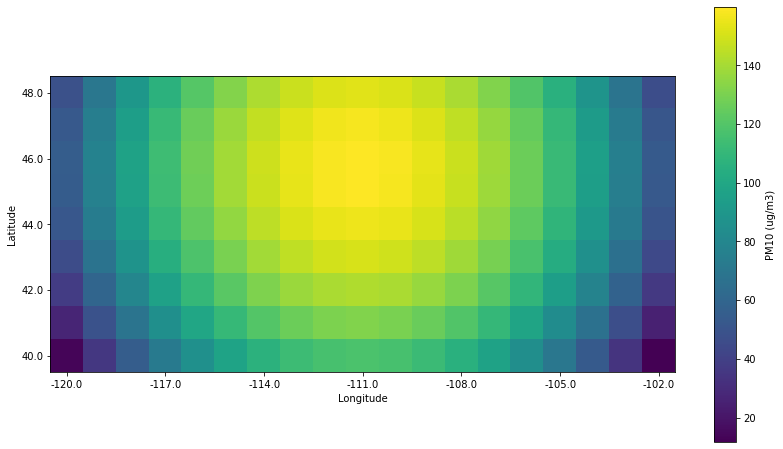

In [61]:
## plot values on a grid. Don't worry too much about how this works yet - we will learn about plotting in a couple of weeks.
import matplotlib.pyplot as plt
import seaborn as sns

def plot_grid(value, long_grid, lat_grid, label):
    fig, ax = plt.subplots(1,1, figsize=(14,8))
    plt.imshow(value)
    plt.colorbar(label = label)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    ax.set_xticks(list(range(0, len(long_grid), 3)))
    ax.set_yticks(list(range(0, len(lat_grid), 2)))
    ax.set_xticklabels(long_grid[::3])
    ax.set_yticklabels(lat_grid[::2])
    
    
plot_grid(pm10, long_grid, lat_grid, 'PM10 (ug/m3)')

Now use ``np.random.normal()`` to add random noise to the data, with mean and standard distribution of 0 and 5 ug/m3, respectively. Then plot the noisy data using ``plot_grid()``.

We will now assume that this "synthetic" dataset is our real data set and use it for analysis. The US EPS's national 24-hour daily standard for PM10 is 150 ug/m3 (for the max 24-hour concentration in one year, averaged over three years. But we will just treat it as a one-day standard for simplicity.)

Use NumPy's built-in functions to answer the following questions:
1. What are the mean and std of PM10 across this region today?

2. Which longitude has the highest mean PM10? Which latitude has the mean lowest?

3. What fraction of grid points exceed the EPA daily standard?

4. Use logical indexing to create an array with 1's at locations violating the standard, and 0's at locations not violating the standard. Plot using ``plot_grid``.

5. Assume the following  logistic function (*completely made up, not a real relationship*) for excess cardiovascular deaths per 1,000 people in the region, based on the daily PM10 concentration. 

$$deaths = \frac{15}{1 + \exp(-(PM10 - 80) / 35)}$$

Create a function that uses NumPy to calculate the excess cardio deaths for a grid of pm10 observations, then calculate and plot the grid of excess deaths.

## Pandas
The final important data structure we will cover is the **Pandas DataFrame**, from the [Pandas package](https://pandas.pydata.org/docs/user_guide/index.html#user-guide). Pandas makes it easy to load and manipulate multi-variate datasets, which makes it great for data analysis and visualization. 

### Creating Pandas DataFrames 
A Pandas DataFrame is similar to a dictionary, in that it is a collection of **keys** and **values**. However, it is more restrictive, in that all values must be lists with the same length and a shared index. This makes it ideal for multivariate datasets, in which we have many different observations of the same set of variables (the name "Pandas" derives from "panel data").

An example will make this more clear. Consider again the county groundwater subsidization program that we introduced in the class exercise for list comprehensions.

In [62]:
import random
## numeric index for each household in county
household = list(range(1000))
print(household[:20])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [63]:
## water source for each household
water = [random.choices(['municipal', 'private'], weights = [0.6, 0.4], k=1)[0] for h in household]
print(water[:20])

['municipal', 'municipal', 'private', 'municipal', 'municipal', 'municipal', 'municipal', 'municipal', 'municipal', 'municipal', 'municipal', 'private', 'private', 'private', 'municipal', 'municipal', 'municipal', 'private', 'municipal', 'private']


In [64]:
## income for each household 
income = [round(random.gauss(40000, 10000),2) for h in household]
print(income[:20])

[62907.46, 24664.12, 41995.28, 40346.52, 27764.05, 26616.17, 44150.4, 54443.04, 34687.0, 45136.34, 28036.27, 17085.39, 40595.33, 37342.27, 41877.12, 39377.9, 41280.0, 47704.89, 51996.38, 43626.38]


Because each of these three lists is the same length, we can create a Pandas DataFrame as follows. Pandas is typically imported with the **alias** ``pd``.

In [65]:
import pandas as pd

county = pd.DataFrame({'household': household, 'water': water, 'income': income})
county

,household,water,income
0,0,municipal,62907.46
1,1,municipal,24664.12
2,2,private,41995.28
3,3,municipal,40346.52
4,4,municipal,27764.05
...,...,...,...
995,995,municipal,45604.64
996,996,private,40729.71
997,997,municipal,43786.87
998,998,private,38535.18


Notice that the argument used to create the DataFrame is a dictionary. Also notice that, unlike NumPy arrays, a Pandas DataFrame can be **mixed type**, but the values in each column must be the same type.

Each Pandas DataFrame has an **index**, given by the column on the far left with no name. If we don't specify the index, it is assumed to be the integers from 0 to the length of the lists in the dictionary (so that, in this case, it matches the household list). We can also specify the index directly:

In [66]:
county = pd.DataFrame({'water': water, 'income': income}, index = household)
print(county)

         water    income
0    municipal  62907.46
1    municipal  24664.12
2      private  41995.28
3    municipal  40346.52
4    municipal  27764.05
..         ...       ...
995  municipal  45604.64
996    private  40729.71
997  municipal  43786.87
998    private  38535.18
999  municipal  44110.41

[1000 rows x 2 columns]


The ``head()`` and ``tail()`` functions can be used to retrieve just the first and last 5 rows:

In [67]:
county.head()

,water,income
0,municipal,62907.46
1,municipal,24664.12
2,private,41995.28
3,municipal,40346.52
4,municipal,27764.05


In [68]:
county.tail()

,water,income
995,municipal,45604.64
996,private,40729.71
997,municipal,43786.87
998,private,38535.18
999,municipal,44110.41


We can retrieve the column names (keys) using ``columns``

In [69]:
county.columns

Index(['water', 'income'], dtype='object')

And access the data in a particular column using 2 different syntaxes:

In [70]:
county['water'].head()

0    municipal
1    municipal
2      private
3    municipal
4    municipal
Name: water, dtype: object

In [71]:
county.water.head()

0    municipal
1    municipal
2      private
3    municipal
4    municipal
Name: water, dtype: object

We create new columns in a similar manner to dictionaries:

In [72]:
## create another column for number of residents in household (again by random sampling)
county.shape

(1000, 2)

In [73]:
import numpy as np
nrow = county.shape[0]
residents = np.random.choice([1, 2, 3, 4, 5, 6], size = nrow, p = [0.3, 0.25, 0.15, 0.15, 0.075, 0.075])
residents

array([2, 6, 4, 2, 2, 4, 4, 5, 4, 2, 1, 1, 1, 4, 3, 1, 3, 2, 2, 1, 3, 2,
       1, 2, 6, 4, 1, 4, 1, 2, 1, 1, 2, 6, 2, 1, 1, 2, 2, 4, 4, 2, 4, 1,
       2, 1, 3, 2, 5, 3, 6, 6, 4, 6, 3, 1, 2, 5, 3, 5, 6, 1, 4, 1, 1, 1,
       3, 3, 1, 2, 4, 1, 1, 3, 4, 1, 6, 4, 2, 4, 3, 2, 1, 3, 5, 1, 3, 3,
       1, 6, 2, 5, 2, 1, 1, 3, 2, 1, 4, 2, 4, 4, 1, 1, 4, 2, 6, 1, 4, 1,
       2, 1, 3, 6, 3, 2, 1, 5, 1, 6, 2, 6, 1, 1, 3, 6, 4, 4, 1, 6, 5, 6,
       1, 1, 5, 3, 1, 3, 2, 4, 3, 2, 4, 4, 1, 1, 1, 6, 2, 4, 1, 1, 3, 1,
       3, 1, 2, 2, 1, 3, 3, 4, 4, 5, 2, 1, 4, 1, 2, 2, 5, 1, 1, 1, 4, 3,
       4, 1, 1, 4, 4, 3, 1, 6, 2, 1, 6, 6, 1, 2, 1, 1, 2, 2, 6, 2, 3, 2,
       1, 1, 2, 3, 1, 6, 4, 1, 2, 2, 1, 2, 2, 2, 6, 1, 4, 1, 1, 2, 2, 6,
       3, 3, 3, 6, 2, 3, 2, 1, 4, 1, 1, 1, 3, 2, 6, 6, 2, 3, 1, 2, 3, 1,
       3, 6, 2, 2, 2, 3, 5, 2, 2, 4, 1, 2, 2, 5, 1, 4, 2, 1, 4, 3, 5, 1,
       1, 6, 1, 2, 1, 1, 1, 3, 1, 4, 4, 4, 3, 1, 1, 4, 2, 6, 3, 2, 3, 2,
       6, 2, 3, 1, 2, 5, 1, 1, 5, 2, 3, 4, 1, 2, 5,

In [74]:
county['residents'] = residents
county.head()

,water,income,residents
0,municipal,62907.46,2
1,municipal,24664.12,6
2,private,41995.28,4
3,municipal,40346.52,2
4,municipal,27764.05,2


### Importing data
Pandas has a number of useful functions for importing data, such as ``pd.read_csv()`` and ``pd.read_excel()``. We will go into more detail about reading and manipulating datasets next week. But for now, a simple example using 5 years of historical stock prices for 5 large tech companies:

In [75]:
## import data. "header=2" tells it to ignore the first two lines and use the 3rd line as the column names.
stocks = pd.read_excel('HistoricalStockPrices.xlsx', sheet_name = 'Combined', header = 2)
stocks.head()

,Date,Apple,Microsoft,Facebook,Amazon,Tesla
0,2020-08-11,437.50,203.38,256.13,3080.67,1374.39
1,2020-08-10,450.91,208.25,263.00,3148.16,1418.57
2,2020-08-07,444.45,212.48,268.44,3167.46,1452.71
3,2020-08-06,455.61,216.35,265.28,3225.00,1489.58
4,2020-08-05,440.25,212.94,249.12,3205.03,1485.02


Notice the type for the "Date" column is automatically assumed to be **datetime64** when it is read in. 

In [76]:
stocks.Date.head()

0   2020-08-11
1   2020-08-10
2   2020-08-07
3   2020-08-06
4   2020-08-05
Name: Date, dtype: datetime64[ns]

In Pandas, datetimes can also be used directly as the index.

In [77]:
stocks = pd.read_excel('HistoricalStockPrices.xlsx', sheet_name = 'Combined', header = 2, index_col = 0)
stocks.head()

,Apple,Microsoft,Facebook,Amazon,Tesla
Date,,,,,
2020-08-11,437.50,203.38,256.13,3080.67,1374.39
2020-08-10,450.91,208.25,263.00,3148.16,1418.57
2020-08-07,444.45,212.48,268.44,3167.46,1452.71
2020-08-06,455.61,216.35,265.28,3225.00,1489.58
2020-08-05,440.25,212.94,249.12,3205.03,1485.02


The index is now a special type of object, **DatetimeIndex**, which has a number of useful properties when manipulating time series data, as we will see next week.

In [78]:
print(stocks.index)

DatetimeIndex(['2020-08-11', '2020-08-10', '2020-08-07', '2020-08-06',
               '2020-08-05', '2020-08-04', '2020-08-03', '2020-07-31',
               '2020-07-30', '2020-07-29',
               ...
               '2015-08-25', '2015-08-24', '2015-08-21', '2015-08-20',
               '2015-08-19', '2015-08-18', '2015-08-17', '2015-08-14',
               '2015-08-13', '2015-08-12'],
              dtype='datetime64[ns]', name='Date', length=1259, freq=None)


It also makes it very convenient for plotting time series, which we will cover in more detail in a couple of weeks.

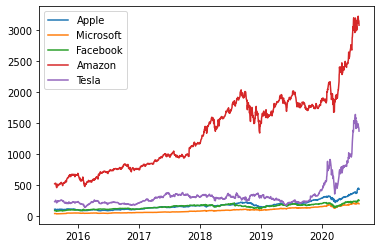

In [79]:
import matplotlib.pyplot as plt
plt.plot(stocks)
plt.legend(stocks.columns)

### Manipulating data 
The developers of Pandas were influenced by the NumPy package, and much of NumPy's functionality is also available for Pandas DataFrames. For example, we can perform element-wise arithmetic on whole columns at a time:

In [80]:
## calculate relative growth of each stock
print(stocks['Apple'][-3])
stocks.tail()

115.96


,Apple,Microsoft,Facebook,Amazon,Tesla
Date,,,,,
2015-08-18,116.50,47.27,95.17,535.02,260.72
2015-08-17,117.16,47.32,93.93,535.22,254.99
2015-08-14,115.96,47.00,94.42,531.52,243.15
2015-08-13,115.15,46.73,93.43,529.66,242.51
2015-08-12,115.24,46.74,94.19,525.91,238.17


In [81]:
companies = []
growth = []
for c in stocks.columns:
    companies.append(c)
    growth.append(c + '_growth')
    stocks[c + '_growth'] = stocks[c] / stocks[c][-1]

print(companies)
print()
print(growth)
print()
stocks.head()

['Apple', 'Microsoft', 'Facebook', 'Amazon', 'Tesla']

['Apple_growth', 'Microsoft_growth', 'Facebook_growth', 'Amazon_growth', 'Tesla_growth']



,Apple,Microsoft,Facebook,Amazon,Tesla,Apple_growth,Microsoft_growth,Facebook_growth,Amazon_growth,Tesla_growth
Date,,,,,,,,,,
2020-08-11,437.50,203.38,256.13,3080.67,1374.39,3.796425,4.351305,2.719291,5.857789,5.770626
2020-08-10,450.91,208.25,263.00,3148.16,1418.57,3.912791,4.455499,2.792228,5.986119,5.956124
2020-08-07,444.45,212.48,268.44,3167.46,1452.71,3.856734,4.545999,2.849984,6.022818,6.099467
2020-08-06,455.61,216.35,265.28,3225.00,1489.58,3.953575,4.628798,2.816435,6.132228,6.254272
2020-08-05,440.25,212.94,249.12,3205.03,1485.02,3.820288,4.555841,2.644867,6.094256,6.235126


Text(0, 0.5, 'Growth')

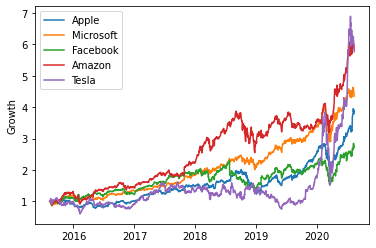

In [82]:
## plot growth
for i, c in enumerate(growth):
    plt.plot(stocks[c], label = companies[i])
    plt.legend()
plt.ylabel('Growth')

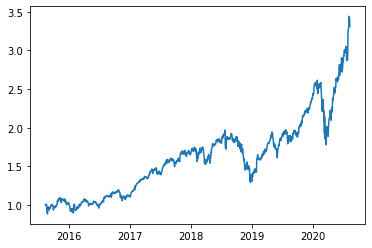

In [83]:
## How would you have done if you had bought 1 share each of Facebook and Apple stock in August 2015?
stocks['Facebook_Apple'] = stocks['Facebook'] + stocks['Apple']
stocks['Facebook_Apple_growth'] = stocks['Facebook_Apple'] / stocks['Facebook_Apple'][-1]
plt.plot(stocks['Facebook_Apple_growth'])

We can also use many NumPy functions directly on Pandas DataFrames. For example, we can create a new DataFrame to hold the statistics of the data.

In [84]:
stocks_stats = pd.DataFrame({'mean': stocks.mean(),
                             'std': stocks.std(),
                             'min': stocks.min(),
                             'max': stocks.max(),
                             'q05': stocks.quantile(0.05),
                             'q95': stocks.quantile(0.95)})
stocks_stats

,mean,std,min,max,q05,q95
Apple,178.405620,69.985242,90.340000,455.610000,97.139000,319.268000
Microsoft,97.529210,42.799750,40.470000,216.540000,49.897000,183.630000
Facebook,158.644774,37.500433,82.090000,268.440000,99.280000,220.691000
Amazon,1352.001164,611.957225,463.370000,3225.000000,555.039000,2408.271000
Tesla,345.804722,229.829204,143.670000,1643.000000,195.435000,815.692000
Apple_growth,1.548122,0.607300,0.783929,3.953575,0.842928,2.770462
Microsoft_growth,2.086633,0.915699,0.865854,4.632863,1.067544,3.928755
Facebook_growth,1.684306,0.398136,0.871536,2.849984,1.054040,2.343041
Amazon_growth,2.570784,1.163616,0.881082,6.132228,1.055388,4.579245
Tesla_growth,1.451924,0.964980,0.603225,6.898434,0.820569,3.424831


Notice that the index is now a string: the columns of the original dataframe.

### Indexing in Pandas
Indexing in Pandas is a bit trickier than other data structures like NumPy arrays or lists. There are three main ways to retrieve data. 

First, as seen above, we can select a particular column at a time. This converts the object from a Pandas DataFrame to a **Pandas Series**, which is similar except one dimensional.

In [85]:
s = stocks_stats['mean']
s

Apple                     178.405620
Microsoft                  97.529210
Facebook                  158.644774
Amazon                   1352.001164
Tesla                     345.804722
Apple_growth                1.548122
Microsoft_growth            2.086633
Facebook_growth             1.684306
Amazon_growth               2.570784
Tesla_growth                1.451924
Facebook_Apple            337.050393
Facebook_Apple_growth       1.609370
Name: mean, dtype: float64

Once you have a series, you can index it similar to a NumPy array or list, using the integer position of the row of interest rather than the label index.

In [86]:
s[:5]

Apple         178.405620
Microsoft      97.529210
Facebook      158.644774
Amazon       1352.001164
Tesla         345.804722
Name: mean, dtype: float64

To convert into an unnamed NumPy array, use the ``values`` attribute.

In [87]:
a = s.values
a

array([ 178.40561954,   97.52920969,  158.64477363, 1352.00116362,
        345.804722  ,    1.54812235,    2.08663264,    1.68430591,
          2.57078429,    1.45192393,  337.05039317,    1.60937016])

The second way to access (and alter) data in Pandas is ``iloc``, which can be used to retrive information based on the **integer position** within the array, much like you would with a NumPy array. For example, to get the standard deviation of Amazon stock, I would use:

In [88]:
print(stocks_stats)
print()
print(stocks_stats.iloc[3, 1])

                              mean         std         min          max  \
Apple                   178.405620   69.985242   90.340000   455.610000   
Microsoft                97.529210   42.799750   40.470000   216.540000   
Facebook                158.644774   37.500433   82.090000   268.440000   
Amazon                 1352.001164  611.957225  463.370000  3225.000000   
Tesla                   345.804722  229.829204  143.670000  1643.000000   
Apple_growth              1.548122    0.607300    0.783929     3.953575   
Microsoft_growth          2.086633    0.915699    0.865854     4.632863   
Facebook_growth           1.684306    0.398136    0.871536     2.849984   
Amazon_growth             2.570784    1.163616    0.881082     6.132228   
Tesla_growth              1.451924    0.964980    0.603225     6.898434   
Facebook_Apple          337.050393  104.314165  185.210000   720.890000   
Facebook_Apple_growth     1.609370    0.498086    0.884353     3.442153   

                        

We can also retrieve **slices** of data using ``iloc``, similar to NumPy.

In [89]:
stocks_stats.iloc[3, :] 

mean    1352.001164
std      611.957225
min      463.370000
max     3225.000000
q05      555.039000
q95     2408.271000
Name: Amazon, dtype: float64

In [90]:
stocks_stats.iloc[:,-1] 

Apple                     319.268000
Microsoft                 183.630000
Facebook                  220.691000
Amazon                   2408.271000
Tesla                     815.692000
Apple_growth                2.770462
Microsoft_growth            3.928755
Facebook_growth             2.343041
Amazon_growth               4.579245
Tesla_growth                3.424831
Facebook_Apple            538.993000
Facebook_Apple_growth       2.573619
Name: q95, dtype: float64

In [91]:
stocks_stats.iloc[1:5,2:4]

,min,max
Microsoft,40.47,216.54
Facebook,82.09,268.44
Amazon,463.37,3225.00
Tesla,143.67,1643.00


Notice that the first two 1D slices create a Series, while the third slice creates another 2D DataFrame.

Lastly, we can use the ``loc`` method to access data based on **label indexes**. For example, I can again get the standard deviation of Amazon stock using:

In [92]:
stocks_stats.loc['Amazon', 'std']

611.9572253632282

I can also get non-contiguous slices using lists of labels:

In [93]:
stocks_stats.loc[['Apple', 'Facebook', 'Facebook_Apple'], ['mean', 'min', 'max']]

,mean,min,max
Apple,178.405620,90.34,455.61
Facebook,158.644774,82.09,268.44
Facebook_Apple,337.050393,185.21,720.89


Be careful using ``loc/iloc`` with integer index labels, as this can get confusing! For example, consider again the county dataset, which has rows labeled 0-999.

In [94]:
county

,water,income,residents
0,municipal,62907.46,2
1,municipal,24664.12,6
2,private,41995.28,4
3,municipal,40346.52,2
4,municipal,27764.05,2
...,...,...,...
995,municipal,45604.64,5
996,private,40729.71,2
997,municipal,43786.87,3
998,private,38535.18,1


Let's say the supervisor decides to split the work between two employees, Juan and Emily. Because Juan is a new employee who is still learning, he will take only the first 300 households, and Emily will take the last 700.

In [95]:
county_juan = county.iloc[:300]
county_emily = county.iloc[300:]
county_emily

,water,income,residents
300,private,35872.03,5
301,private,19822.86,2
302,private,18914.82,2
303,municipal,52745.38,2
304,municipal,53665.05,2
...,...,...,...
995,municipal,45604.64,5
996,private,40729.71,2
997,municipal,43786.87,3
998,private,38535.18,1


Now Emily's DataFrame has 700 rows. The integer positions of the rows go from 0-699, while the labeled indexes go from 300-999. Thus, she will get different entries for row 500 depending on whether she means the position or the label.

In [96]:
print( county_emily.iloc[500, :] )
print()
print( county_emily.loc[500, :] )

water        municipal
income         41275.9
residents            4
Name: 800, dtype: object

water        private
income       39832.2
residents          6
Name: 500, dtype: object


This is a **very easy way to introduce bugs** in your code if you are not careful, so always be aware of whether you are using ``iloc`` or ``loc``. 

Sometimes it is helpful to reset the labeled index so that it matches the integer position.

In [97]:
county_emily_reset = county_emily.reset_index(drop = True, inplace = False)
county_emily_reset

,water,income,residents
0,private,35872.03,5
1,private,19822.86,2
2,private,18914.82,2
3,municipal,52745.38,2
4,municipal,53665.05,2
...,...,...,...
695,municipal,45604.64,5
696,private,40729.71,2
697,municipal,43786.87,3
698,private,38535.18,1


In [98]:
county_emily.reset_index(drop = False, inplace = True)
county_emily

,index,water,income,residents
0,300,private,35872.03,5
1,301,private,19822.86,2
2,302,private,18914.82,2
3,303,municipal,52745.38,2
4,304,municipal,53665.05,2
...,...,...,...,...
695,995,municipal,45604.64,5
696,996,private,40729.71,2
697,997,municipal,43786.87,3
698,998,private,38535.18,1


### Logical indexing in Pandas
Similar to NumPy, we can use **logical indexing** to access and manipulate portions of our data that meet certain conditions. To do so, we use ``loc`` again. For example, I can grab the subset of households with private water access:

In [99]:
private = county['water'] == 'private'
print(private)
print()

0      False
1      False
2       True
3      False
4      False
       ...  
995    False
996     True
997    False
998     True
999    False
Name: water, Length: 1000, dtype: bool



In [100]:
county_private = county.loc[private, :]
county_private

,water,income,residents
2,private,41995.28,4
11,private,17085.39,1
12,private,40595.33,1
13,private,37342.27,4
17,private,47704.89,2
...,...,...,...
988,private,43593.99,1
989,private,28785.74,2
992,private,52947.41,3
996,private,40729.71,2


Like NumPy, we use the **bitwise comparison operators** ``&`` and ``|`` for multiple-comparison selections. 

### In class exercises
1. Find the households eligible for subsidized groundwater testing

2. How many of these households are there?

3. What is the total number of residents that would be served by this program?

4. Assume the county wants to finance this testing using a fee on its municipal water users. Municipal households with incomes below \$30,000 will be exempt from the fee. How many households will have to pay this new fee?

5. If each eligible private water household signs up for the program, and each subsidized test costs the county \$100, how large is the fee that will be charged to municipal water households?